# Dice Roll Simulation
Goal: Simulate rolling 1 or 2 dice multiple times, summarize outcomes, visualize distributions, and practice structured data workflows.

## Ingest
Simulate dice rolls and generate synthetic data.

In [13]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Configurable Parameters
NUM_TRIALS = 10000
NUM_DICE = 2 # Change to 1 for single-die simulation
SEED = 42
random.seed(SEED)

# Simulate dice rolls
def roll_dice(n_dice: int = 2) -> int:
    return sum(random.randint(1, 6) for _ in range(n_dice))

def run_simulation(num_trials: int, num_dice: int) -> list:
    return [roll_dice(num_dice) for _ in range(num_trials)]

rolls = run_simulation(NUM_TRIALS, NUM_DICE)
rolls[:10]

[7, 7, 5, 4, 7, 12, 6, 9, 2, 3]

## Exploratory Data Analysis (EDA)
Summarize results and visualize outcome distribution.

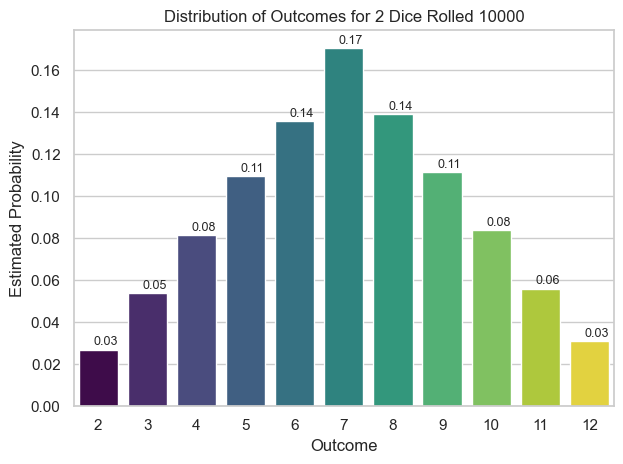

In [14]:
# Summarize results
def summarize_results(rolls: list) -> pd.DataFrame:
    counts = Counter(rolls)
    df = pd.DataFrame(sorted(counts.items()), columns=["Outcome", "Frequency"])
    df["Probability"] = df["Frequency"] / len(rolls)
    return df

results_df = summarize_results(rolls)
results_df

# Plot Distribution
def plot_distribution(df: pd.DataFrame, num_dice: int):
    plt.figure(figure=(10, 6))
    ax = sns.barplot(
        x="Outcome",
        y="Probability",
        hue="Outcome",           
        data=df,
        palette="viridis",
        legend=False             
    )
    plt.title(f"Distribution of Outcomes for {num_dice} Dice Rolled {NUM_TRIALS}")
    plt.ylabel("Estimated Probability")
    plt.xlabel("Outcome")
    plt.xticks(rotation=0)
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + 0.3, p.get_height() + 0.002), fontsize=9)
    plt.tight_layout()
    plt.show()
    
plot_distribution(results_df, NUM_DICE)        

# Modeling

This simulation does not include predictive modeling, as the purpose is to demonstrate empirical vs. theoretical probabilities using synthetics data.


# Conclusion

This dice roll simulation, while simple in setup, demonstrates several foundational concepts in data science and simulation modeling:

- **Empirical Probability**: By simulating thousands of trials, we observe how real-world results approximate theoretical expectations. For two dice, outcomes like 7 appear most frequently, while extremes like 2 and 12 are rare — confirming the expected distribution.

- **Reproducibility**: Using a fixed random seed ensures that our results can be reproduced — a critical practice in scientific computing, machine learning experimentation, and MLOps pipelines.

- **Modularity**: The simulation is structured with reusable, well-documented functions. This is not just good practice — it mirrors how production-ready ML code should be designed: testable, scalable, and easy to debug.

- **Visualization**: Plotting the outcome probabilities helps interpret the data clearly and tells a compelling story, reinforcing the importance of visual tools in exploratory data analysis.

- **Simulation Thinking**: Even a basic example like this builds a foundation for more complex stochastic modeling techniques used in real-world systems — from risk analysis and queueing theory to Monte Carlo methods and probabilistic ML models.

This exercise reinforces the principle that even simple simulations can yield powerful insights when approached with the right structure, tools, and mindset.
